In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from random import randint

In [ ]:
# ******** Make a mini-cube of the central 3x3 region ********

In [2]:
fits_filename = ('/Users/orion/phd_research/3C297/finalcube_3C297_mediansubtracted.fits')
hdul = fits.open(fits_filename)
hdul.info() 

Filename: /Users/orion/phd_research/3C297/0final_3C297_medsub.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     779   (66, 68, 2210)   float32   


In [3]:
data_cube = hdul[0].data
cube_header = hdul[0].header
cw = cube_header['CRVAL3']         #central wavelength
mp = cube_header['CDELT3']         #microns per pixel

In [ ]:
error_cube = data_cube[:,32:35,32:35]                 #3x3 cube: (32,32) to (34,34)
#print (np.shape(error_cube))
stderror_cube = np.std(error_cube,axis=(1,2))
#print (np.shape(stderror_cube))

In [ ]:
# 3x3 error cube
summed = np.arange(len(data_cube), dtype=float)
summed = 0
for i in range(32,35):
    for j in range(32,35):
        print (i,j)
        summed += data_cube[:,i,j]

#print (np.shape(summed))

y = summed             
x = np.arange(len(y))


In [5]:
print (cw,mp)
start_w = cw - cube_header['CRPIX3']*mp 
x = start_w + x*mp


# line-free region in spectrum => continuum 
select_cont = (x>1.70) & (x<1.80)

#x[select_cont]     #check
x

1.64999997615814 0.000195000000530854


array([1.43452498, 1.43471998, 1.43491498, ..., 1.86488998, 1.86508498,
       1.86527998])

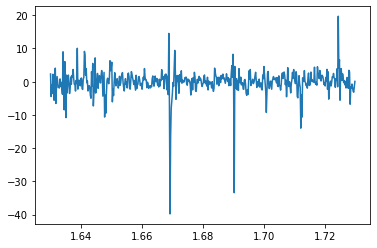

In [6]:
cont_wave = x[select_cont]

cont_data = y[select_cont]              #-- for 3x3 
#cont_data = central_pix[select_cont]  # -- for per spaxel fitting

plt.plot(cont_wave,cont_data)

In [7]:
s = np.mean(cont_data)  # mean continuum => signal
n = np.std(cont_data)   # std. dev. in continuum => noise

snr = (s/n)

sn_cube = np.sqrt(data_cube/s)*snr   # (datacube / mean continuum)^1/2  =>  error cube 
err = np.sqrt(data_cube*s)/snr   

#check size & dimensions
np.shape(sn_cube)

/Users/orion/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/Users/orion/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


(2210, 68, 66)

In [8]:
hdu = fits.PrimaryHDU(sn_cube)
hdul = fits.HDUList(fits.PrimaryHDU(sn_cube))
hdul[0].header = cube_header
hdul.writeto('3x3spaxel_error_cube.fits') 